<a href="https://colab.research.google.com/github/nguyenanhtienabcd/AIO2024_EXERCISE/blob/feature%2FMODULE6-WEEK4/m06w04_ex02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install dataset

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from datasets import load_dataset
ds = load_dataset ('thainq107/ntc-scv')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/570 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.8M [00:00<?, ?B/s]

valid-00000-of-00001.parquet:   0%|          | 0.00/6.35M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/6.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [4]:
import re
import string

def preprocess_text(text):
    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(' ', text)

    # Remove HTML Tags
    html_pattern = re.compile(r'<.*?>')
    text = html_pattern.sub(' ', text)

    # Remove punctuation and digits
    replace_chars = list(string.punctuation + string.digits)
    for char in replace_chars:
        text = text.replace(char, " ")

    # Remove emoji
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002600-\U000026FF"  # miscellaneous symbols
        "\U00002700-\U000027BF"  # dingbats
        "\U0001F900-\U0001F9FF"  # supplemental symbols
        "\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
        "\U0001F004"             # Mahjong tile red dragon
        "\U0001F0CF"             # playing card black joker
        "]+",
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # Normalize whitespace
    text = " ".join(text.split())

    # Lowercasing
    text = text.lower()
    return text


In [9]:
!pip install torchtext==0.17.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [10]:
def yield_tokens(sentences, tokenizer):
    for sentence in sentences:
        yield tokenizer(sentence)

# word-base tokenizer
from torchtext.data import get_tokenizer
tokenizer = get_tokenizer('basic_english')

# build vocabuary
from torchtext.vocab import build_vocab_from_iterator

vocab_size  = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(ds['train']['preprocessed_sentence'], tokenizer),
    max_tokens=vocab_size,
    specials = ["<pad>", "<unk>"]
)
vocabulary.set_default_index(vocabulary["<unk>"])


In [11]:
from torchtext.data.functional import to_map_style_dataset
def prepare_dataset(df):
  for row in df:
    sentence = row['preprocessed_sentence']
    encoded_sentence = vocabulary(tokenizer(sentence))
    label = row['label']
    yield encoded_sentence, label

In [12]:
train_dataset = prepare_dataset(ds['train'])
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(ds['valid'])
valid_dataset = to_map_style_dataset(valid_dataset)

test_dataset = prepare_dataset(ds['test'])
test_dataset = to_map_style_dataset(test_dataset)


**Mục đích của việc xây dựng hàm ```collage_batch```:** là để có thể tạo add thêm phần padding vào trong các câu mà có độ dài không đủ theo một độ dài tiêu chuẩn cho trước

*   Nếu độ dài câu nhỏ hơn seq_length:
    Thêm các số 0 (tương ứng với token <pad> trong từ điển) vào cuối câu để đạt chiều dài seq_length.
Ví dụ: Nếu sentence = [1, 2, 3] và seq_length = 5, kết quả sẽ là [1, 2, 3, 0, 0].
*   Nếu độ dài câu lớn hơn seq_length:
    Cắt bớt câu chỉ giữ lại seq_length token đầu tiên.
Ví dụ: Nếu sentence = [1, 2, 3, 4, 5, 6] và seq_length = 5, kết quả sẽ là [1, 2, 3, 4, 5]

In [13]:
import torch
import torch.nn as nn

seq_length = 100

def collage_batch(batch):
  # cộng thêm phần pad vào để cho các câu có cùng độ dài
  sentences, label = list(zip(*batch))
  encoded_sentences = [
      sentence + ([0]*(seq_length - len(sentence))) if len(sentence) < seq_length else sentence[:seq_length]
      for sentence in sentences
  ]
  encoded_sentences = torch.tensor(encoded_sentences)
  #encoded_sentences = list(encoded_sentences)
  label = torch.tensor(label)
  return encoded_sentences, label

In [14]:
from torch.utils.data import dataloader
batch_size = 128

train_dataloader = dataloader.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=collage_batch)

valid_dataloader = dataloader.DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collage_batch)

test_dataloader = dataloader.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=collage_batch)

In [15]:
# trainer
import time
def train_epoch(model, optimizer, criterion, train_dataloader, device,
                epoch, log_interval = 50):
  model.train()
  total_acc, total_count = 0, 0
  losses = []
  start_time = time.time()

  for idx, (input, label) in enumerate(train_dataloader):
    optimizer.zero_grad()
    input, label = input.to(device), label.to(device)
    output = model(input)

    # compute loss
    loss = criterion(output, label)
    losses.append(loss.item())

    # backward
    loss.backward()
    optimizer.step()

    # compute accuracy
    total_acc += (output.argmax(1) == label).sum().item()
    total_count += label.size(0)
    if idx % log_interval == 0 and idx > 0:
      elapsed = time.time() - start_time
      print('| epoch {:3d} | {:5d}/{:5d} batches '
            '| accuracy {:8.3f} |'.format(epoch, idx, len(train_dataloader),
                                          total_acc/total_count))
      start_time = time.time()
    epch_loss = sum(losses)/len(losses)
    epch_acc = total_acc/total_count
  return epch_loss, epch_acc


# evaluate
def evaluate(model, criterion, valid_dataloader, device):
  model.eval()
  total_acc, total_count = 0, 0
  losses = []
  with torch.no_grad():
    for idx, (input, label) in enumerate(valid_dataloader):
      input, label = input.to(device), label.to(device)
      output = model(input)
      loss = criterion(output, label)
      losses.append(loss.item())
      total_acc += (output.argmax(1) == label).sum().item()
      total_count += label.size(0)
    epch_loss = sum(losses)/len(losses)
    epch_acc = total_acc/total_count
  return epch_loss, epch_acc


In [16]:
def train(model, optimizer, criterion, save_model, train_dataloader, valid_dataloader, num_epochs, device):
  train_losses = []
  train_accs = []
  valid_losses = []
  valid_accs = []
  best_loss_val = 100
  times=[]
  for epoch in range(1, num_epochs + 1):
    epoch_start_time = time.time()

    epch_loss, epch_acc = train_epoch(model, optimizer, criterion, train_dataloader, device, epoch)
    train_losses.append(epch_loss)
    train_accs.append(epch_acc)

    valid_loss, valid_acc = evaluate(model, criterion, valid_dataloader, device)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)

    if valid_loss < best_loss_val:
      best_loss_val = valid_loss
      torch.save(model.state_dict(), save_model + '/transfomer_model.pt')


      print("-"*59)
      print("| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3}"
      "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f}".format(epoch, (time.time() - epoch_start_time),
                                                              epch_acc, epch_loss, valid_acc, valid_loss))
      print("-"*59)


      # load the best model
      model.load_state_dict(torch.load(save_model + '/transfomer_model.pt'))
      model.eval()
      metrics = {
          'train_loss': train_losses,
          'train_acc': train_accs,
          'valid_loss': valid_losses,
          'valid_acc': valid_accs,
          'time': times
      }
  return model, metrics


### Tranformer

In [17]:
class TokenAndPositionEmbedding(nn.Module):
  def __init__(self, vocab_size, embedding_dim, max_len, device = 'cpu'):
    super().__init__()
    self.device = device
    self.word_emb = nn.Embedding(vocab_size, embedding_dim)
    self.pos_emb = nn.Embedding(max_len, embedding_dim)

  def forward(self, x):
    N, seq_len = x.size() # với N là số lượng batch, seq_len là độ dài của một chuỗi token
    # tạo một ma trận vị trí cho các chuỗi token
    positions = torch.arange(0, seq_len).expand(N, seq_len).to(x.device)
    output1 = self.word_emb(x) # embeding các phần tử
    output2 = self.pos_emb(positions)
    return output1 + output2

In [18]:
# encoder
class TransformerEncoderBlock(nn.Module):
  def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
    super().__init__()
    self.attn = nn.MultiheadAttention(
        embed_dim = embed_dim,
        num_heads = num_heads,
        dropout = dropout
    )
    # tạo một lớp feed forward để tăng khả năng biểu diễn phi tuyến
    # và cải thiện hiệu xuất huấn luyện
    self.ffn = nn.Sequential(
        nn.Linear(embed_dim, ff_dim, bias = True),
        nn.ReLU(),
        nn.Linear(ff_dim, embed_dim, bias = True)
    )
    self.layernorm_1 = nn.LayerNorm(normalized_shape=embed_dim, eps = 1e-6)
    self.layernorm_2 = nn.LayerNorm(normalized_shape=embed_dim, eps = 1e-6)
    self.dropout_1 = nn.Dropout(dropout)
    self.dropout_2 = nn.Dropout(dropout)

# xây dựng mô hình tương tự như ảnh
  def forward(self, query, key, value):
    attn_out, _ = self.attn(query, key, value)
    attn_out = self.dropout_1(attn_out)
    # Residual Connection and layernorm
    out1 = self.layernorm_1(query + attn_out)
    ffn_out = self.ffn(out1)
    ffn_out = self.dropout_2(ffn_out)
    # Residual Connection and layernorm
    out2 = self.layernorm_2(out1 + ffn_out)
    return out2

In [19]:
class TransformerEncoder(nn.Module):
  def __init__(self, scr_vocab_size, embed_dim, max_len, num_heads,
               ff_dim, num_layers, dropout=0.1, device = 'cpu'):
    super().__init__()
    self.embedding = TokenAndPositionEmbedding(scr_vocab_size,  embed_dim,
                                               max_len, device = 'cpu')
    self.layer = nn.ModuleList([
        TransformerEncoderBlock(embed_dim, num_heads, ff_dim, dropout)
        for _ in range(num_layers)
    ])

  def forward(self, x, mask = None):
    x = self.embedding(x)
    for layer in self.layer:
      # phần này chạy theo hàm forward trong TransformerEncoderBlock
      # xem như phần query, key, value
      x = layer(x, x, x)
    return x

In [20]:
# modeling
class TransformerEncoderCls(nn.Module):
  def __init__(self, vocab_size, max_len, num_layers, embed_dim, num_heads, hidden_dim,
               device = 'cpu', dropout = 0.1):
    super(TransformerEncoderCls, self).__init__()
    self.encoder = TransformerEncoder(vocab_size, embed_dim, max_len, num_heads, hidden_dim, num_layers, dropout)
    self.dropout = nn.Dropout(dropout)
    self.pooling = nn.AvgPool1d(kernel_size = max_len)
    self.fc1 = nn.Linear(embed_dim, 20)
    self.fc2 = nn.Linear(20, 2)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.encoder(x)
    x = self.pooling(x.permute(0, 2, 1)).squeeze()
    x = self.dropout(x)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    return x



In [21]:
# training
import torch.optim as optim
import os

vocab_size = 10000
max_len = 100
embed_dim = 200
num_layers = 2
num_heads = 4
ff_dim = 128
dropout = 0.1

model = TransformerEncoderCls(vocab_size, max_len, num_layers, embed_dim, num_heads, ff_dim, dropout)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()
optim = optim.Adam(model.parameters(), lr = 0.00005)
num_epoch = 50
save_model = './model'
os.makedirs(save_model, exist_ok = True)
model, metrics = train(model, optim, criterion, save_model, train_dataloader, valid_dataloader, num_epoch, device)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

| epoch   1 |    50/  235 batches | accuracy    0.519 |
| epoch   1 |   100/  235 batches | accuracy    0.516 |
| epoch   1 |   150/  235 batches | accuracy    0.521 |
| epoch   1 |   200/  235 batches | accuracy    0.524 |
-----------------------------------------------------------
| End of epoch   1 | Time:  8.84s | Train Accuracy    0.528 | Train Loss    0.691| Valid Accuracy    0.549 | Valid Loss    0.687
-----------------------------------------------------------
| epoch   2 |    50/  235 batches | accuracy    0.559 |
| epoch   2 |   100/  235 batches | accuracy    0.566 |
| epoch   2 |   150/  235 batches | accuracy    0.572 |
| epoch   2 |   200/  235 batches | accuracy    0.591 |
-----------------------------------------------------------
| End of epoch   2 | Time:  7.74s | Train Accuracy    0.602 | Train Loss    0.672| Valid Accuracy    0.645 | Valid Loss    0.649
-----------------------------------------------------------
| epoch   3 |    50/  235 batches | accuracy    0.691 

In [22]:
# report
import matplotlib.pyplot as plt

def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
    epochs = list(range(num_epochs))

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    axs[0].plot(epochs, train_accs, label="Training")
    axs[0].plot(epochs, eval_accs, label="Evaluation")
    axs[1].plot(epochs, train_losses, label="Training")
    axs[1].plot(epochs, eval_losses, label="Evaluation")
    axs[0].set_xlabel("Epochs")
    axs[1].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_ylabel("Loss")
    plt.legend()


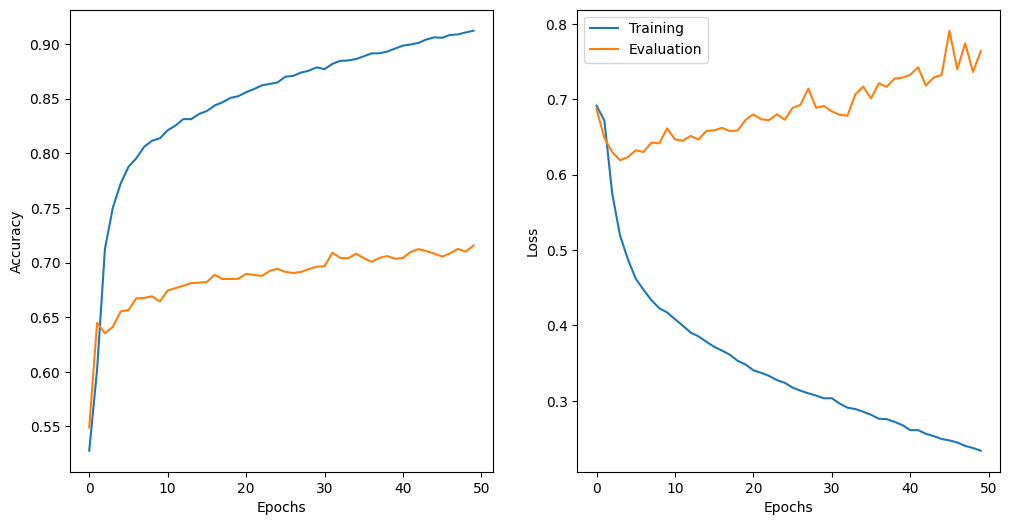

In [23]:
plot_result(num_epoch, metrics['train_acc'], metrics['valid_acc'], metrics['train_loss'], metrics['valid_loss'])
#